In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# 一.重复值处理

In [2]:
dict = {
    'name': ['刘婷婷', '王淼', '彭岩', '刘华', '刘华', '周华'],
    'age': [24, 23, 29, 22, 22, 27],
    'height': [162, 165, 175, 175, 175, 178],
    'gender': ['女', '女', '男', '男', '男', '男']
}
df = DataFrame(dict)
df

,name,age,height,gender
0,刘婷婷,24,162,女
1,王淼,23,165,女
2,彭岩,29,175,男
3,刘华,22,175,男
4,刘华,22,175,男
5,周华,27,178,男


In [3]:
df.duplicated() # 检查是否有重复值, 返回由布尔值组成的Series对象

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [4]:
df.drop_duplicates() # 删除重复值, 删除第二个重复值

,name,age,height,gender
0,刘婷婷,24,162,女
1,王淼,23,165,女
2,彭岩,29,175,男
3,刘华,22,175,男
5,周华,27,178,男


In [5]:
df.drop_duplicates(keep='last') # 保留最后一个出现的重复值

,name,age,height,gender
0,刘婷婷,24,162,女
1,王淼,23,165,女
2,彭岩,29,175,男
4,刘华,22,175,男
5,周华,27,178,男


In [6]:
df.drop_duplicates(keep=False) # 不保留任何重复值

,name,age,height,gender
0,刘婷婷,24,162,女
1,王淼,23,165,女
2,彭岩,29,175,男
5,周华,27,178,男


# 二.异常值检测

## 1.3σ原则

In [7]:
csv_data = pd.read_csv(r'./data/example_data.csv')
csv_data.head()

,A,B
0,1,2
1,2,3
2,3,8
3,4,5
4,5,6


In [8]:
def three_sigma(ser):
    """
    ser: 接收DataFrame对象的一列数据
    return: 返回异常值及其对应的行索引
    """
    mean_data = ser.mean() # 平均值
    std_data = ser.std() # 标准差
    rule = (mean_data - 3 * std_data > ser) | (mean_data + 3 * std_data < ser)
    index = np.arange(ser.shape[0])[rule] # 返回异常值所在行索引
    outliers = ser.iloc[index] # 获取异常值
    return outliers

In [9]:
three_sigma(csv_data['A'])

5    560
Name: A, dtype: int64

In [10]:
three_sigma(csv_data['B'])

Series([], Name: B, dtype: int64)

## 练习

In [11]:
excel_data = pd.read_excel(r'./data/data.xlsx', index_col=0) # 用第一列作为行索引
excel_data.head()

,value
0,12.7
1,9.9
2,10.2
3,10.6
4,8.6


In [12]:
three_sigma(excel_data['value'])

121    13.2
710    13.1
Name: value, dtype: float64

检测数据是否为正态分布

In [13]:
import scipy.stats as stats

In [14]:
u = excel_data['value'].mean()
std = excel_data['value'].std()
stats.kstest(excel_data['value'], 'norm', (u, std)) # pvalue > 0.05即认为符合正态分布

KstestResult(statistic=0.02687507149307844, pvalue=0.4633738343918331)

## 练习:检测csv_data是否符合正态分布

In [15]:
u = csv_data['A'].mean()
std = csv_data['A'].std()
stats.kstest(csv_data['A'], 'norm', (u, std))

KstestResult(statistic=0.4720215932615214, pvalue=0.00020889631652254667)

## 2.箱型图

In [16]:
excel_data.head()

,value
0,12.7
1,9.9
2,10.2
3,10.6
4,8.6


In [17]:
excel_data.boxplot(column='value')

## 练习

In [18]:
csv_data.head()

,A,B
0,1,2
1,2,3
2,3,8
3,4,5
4,5,6


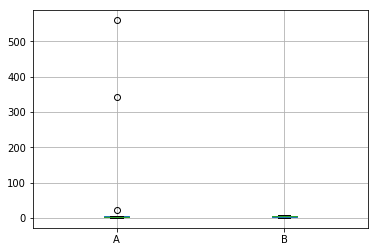

In [19]:
csv_data.boxplot(column=['A', 'B'])

In [20]:
dict = {
    'A': [1, 2, 3, 4],
    'B': [2, 3, 5, 2],
    'C': [1, 4, 7, 4],
    'D': [1, 5, 30, 3]
}
df = DataFrame(dict)
df

,A,B,C,D
0,1,2,1,1
1,2,3,4,5
2,3,5,7,30
3,4,2,4,3


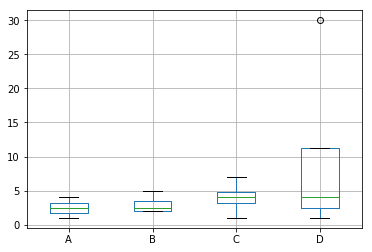

In [21]:
df.boxplot(column=['A', 'B', 'C', 'D'])

In [22]:
def box_outliers(ser):
    new_ser = ser.sort_values()# 对待检测的数据集进行排序
    if new_ser.count() % 2 == 0: # 判断数据的总数量是奇数还是偶数
        # 计算Q3、Q1、IQR
        Q3 = new_ser[int(len(new_ser) / 2):].median()
        Q1 = new_ser[:int(len(new_ser) / 2)].median()
    elif new_ser.count() % 2 != 0:
        Q3 = new_ser[int((len(new_ser)-1) / 2):].median()
        Q1 = new_ser[:int((len(new_ser)-1) / 2)].median()
    IQR = round(Q3 - Q1, 1)
    rule = (round(Q3+1.5*IQR, 1) < ser)|(round(Q1-1.5*IQR, 1) > ser)
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值及其索引
    outliers = ser.iloc[index]
    return outliers

In [23]:
box_outliers(csv_data['A']) # 检查A列异常数据

5     560
15     23
17    342
Name: A, dtype: int64

## 练习:处理tips文件内的异常数据

In [24]:
csv_data = pd.read_csv(r'./data/tips.csv')
csv_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
box_outliers(csv_data['total_bill']) # 检查total_bill列异常数据

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

In [26]:
box_outliers(csv_data['tip']) # 检查tip列异常数据

23      7.58
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
Name: tip, dtype: float64

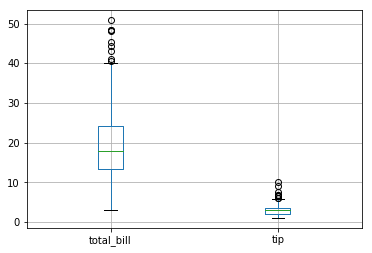

In [27]:
csv_data.boxplot(column=['total_bill', 'tip'])

# 三.异常值的处理

In [28]:
clear_csv_data = csv_data.drop([23, 59, 141, 170, 183, 212, 214]) #该函数有返回值
clear_csv_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


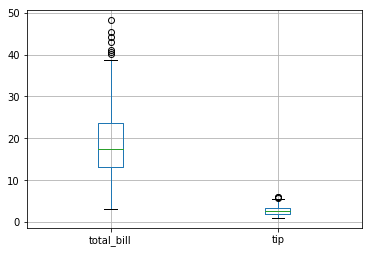

In [29]:
clear_csv_data.boxplot(column=['total_bill', 'tip'])

In [30]:
box_outliers(clear_csv_data['tip'])

47     6.00
88     5.85
239    5.92
Name: tip, dtype: float64

In [31]:
csv_data = pd.read_csv(r'./data/example_data.csv')
csv_data.head()

,A,B
0,1,2
1,2,3
2,3,8
3,4,5
4,5,6


In [32]:
box_outliers(csv_data['A'])

5     560
15     23
17    342
Name: A, dtype: int64

In [33]:
clear_csv_data = csv_data.replace(to_replace=560, value=np.NaN)
clear_csv_data.head(6)

,A,B
0,1.0,2
1,2.0,3
2,3.0,8
3,4.0,5
4,5.0,6
5,NaN,7


In [34]:
clear_csv_data = csv_data.replace({560:np.NaN, 23:np.NaN, 342:np.NaN})
clear_csv_data.head(6)

,A,B
0,1.0,2.0
1,2.0,3.0
2,3.0,8.0
3,4.0,5.0
4,5.0,6.0
5,NaN,7.0


In [35]:
box_outliers(clear_csv_data['A'])

Series([], Name: A, dtype: float64)